## ***Import Dependencies***

In [69]:
import numpy as np
import pandas as pd

from mlxtend.plotting import plot_decision_regions
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

### **Classification Models to be considered:**
    1. Logistic Regression
    2. Logistic Regression with Cross Validator
    3. Stochastic Gradient Descent Classifier
    4. Gaussian Naive Bayes
    5. K Nearest Neighbors
    6. Random Forest Classifier
    7. Support Vector Machine

In [2]:
from google.colab import files
import io

from sklearn.linear_model import LogisticRegression, LogisticRegressionCV, SGDClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [83]:
from sklearn.model_selection import GridSearchCV, train_test_split, RandomizedSearchCV
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score, plot_confusion_matrix
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.externals import joblib

## ***Importing Data Source***

In [4]:
uploaded = files.upload()

Saving train.csv to train.csv


In [120]:
data = pd.read_csv(io.BytesIO(uploaded['train.csv']))
data

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,14,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,3,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,3,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,5,336,670,869,18,10,19,1,1,1,0


In [121]:
data.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1


In [122]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  three_g        2000 non-null   int64  
 18  touch_sc

In [123]:
data.describe()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,9.916500,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,6.064315,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,0.000000,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,5.000000,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,10.000000,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,15.000000,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,20.000000,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [146]:
# Renaming column names
names = ['Battery', 'Bluetooth', 'ClockSpeed', 'DualSim', 'FrontCam',
         'FourG', 'Internal', 'Depth', 'Weight', 'NumCores',
         'PrimaryCam', 'PxHeight', 'PxWidth', 'Ram', 'ScHeight', 'ScWidth',
         'TalkTime', 'ThreeG', 'Touch', 'WiFi', 'PriceRange']

data.columns = names
data


,Battery,Bluetooth,ClockSpeed,DualSim,FrontCam,FourG,Internal,Depth,Weight,NumCores,PrimaryCam,PxHeight,PxWidth,Ram,ScHeight,ScWidth,TalkTime,ThreeG,Touch,WiFi,PriceRange
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,14,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,3,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,3,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,5,336,670,869,18,10,19,1,1,1,0


#### ***Categorical Data and Numerical Data***

In [10]:
num_col = data.select_dtypes(include = np.number).columns
categ_col = data.select_dtypes(exclude = np.number).columns

print("\n Numerical Columns: ", num_col)
print("\n Categorical Columns: ", categ_col)


 Numerical Columns:  Index(['Battery', 'Bluetooth', 'ClockSpeed', 'DualSim', 'FrontCam', 'FourG',
       'Internal', 'Depth', 'Weight', 'NumCores', 'PrimaryCam', 'PxHeight',
       'PxWidth', 'Ram', 'ScHeight', 'ScWidth', 'TalkTime', 'ThreeG', 'Touch',
       'WiFi', 'PriceRange'],
      dtype='object')

 Categorical Columns:  Index([], dtype='object')


In [125]:
# Checking for NA values

print(data.isna().sum())
print(data.shape)

Battery       0
Bluetooth     0
ClockSpeed    0
DualSim       0
FrontCam      0
FourG         0
Internal      0
Depth         0
Weight        0
NumCores      0
PrimaryCam    0
PxHeight      0
PxWidth       0
Ram           0
ScHeight      0
ScWidth       0
TalkTime      0
ThreeG        0
Touch         0
WiFi          0
PriceRange    0
dtype: int64
(2000, 21)


## ***Data Visualization and Exploratory Data Analysis***

### ***1. Checking Target Class Distribution***

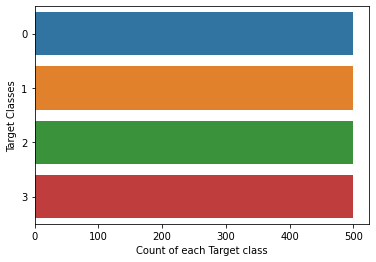

In [12]:
sns.countplot(y = data['PriceRange'], data = data)
plt.xlabel('Count of each Target class')
plt.ylabel('Target Classes')
plt.show()

Conclusion : Target Variable 'Price Range' is equally distributed.

### ***2. Checking Feature Distribution***

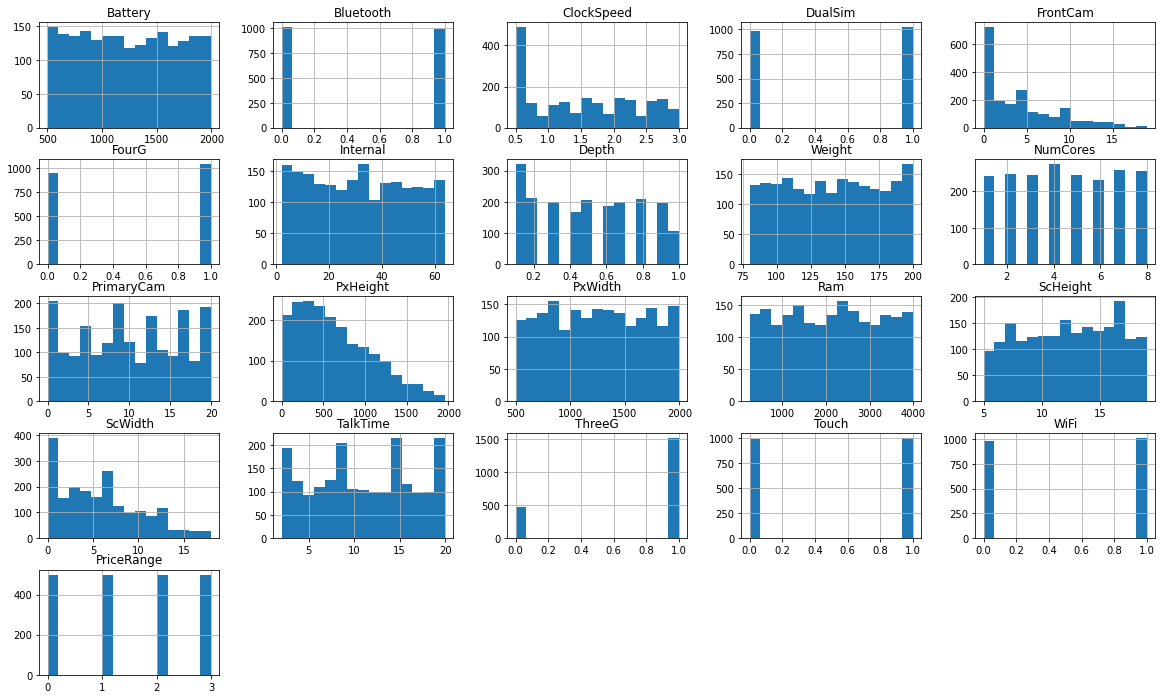

In [13]:
data.hist(figsize = (20, 12), bins = 15)
plt.title('Feature Distribution')
plt.show()

### ***3. Check Collinearity of Data***

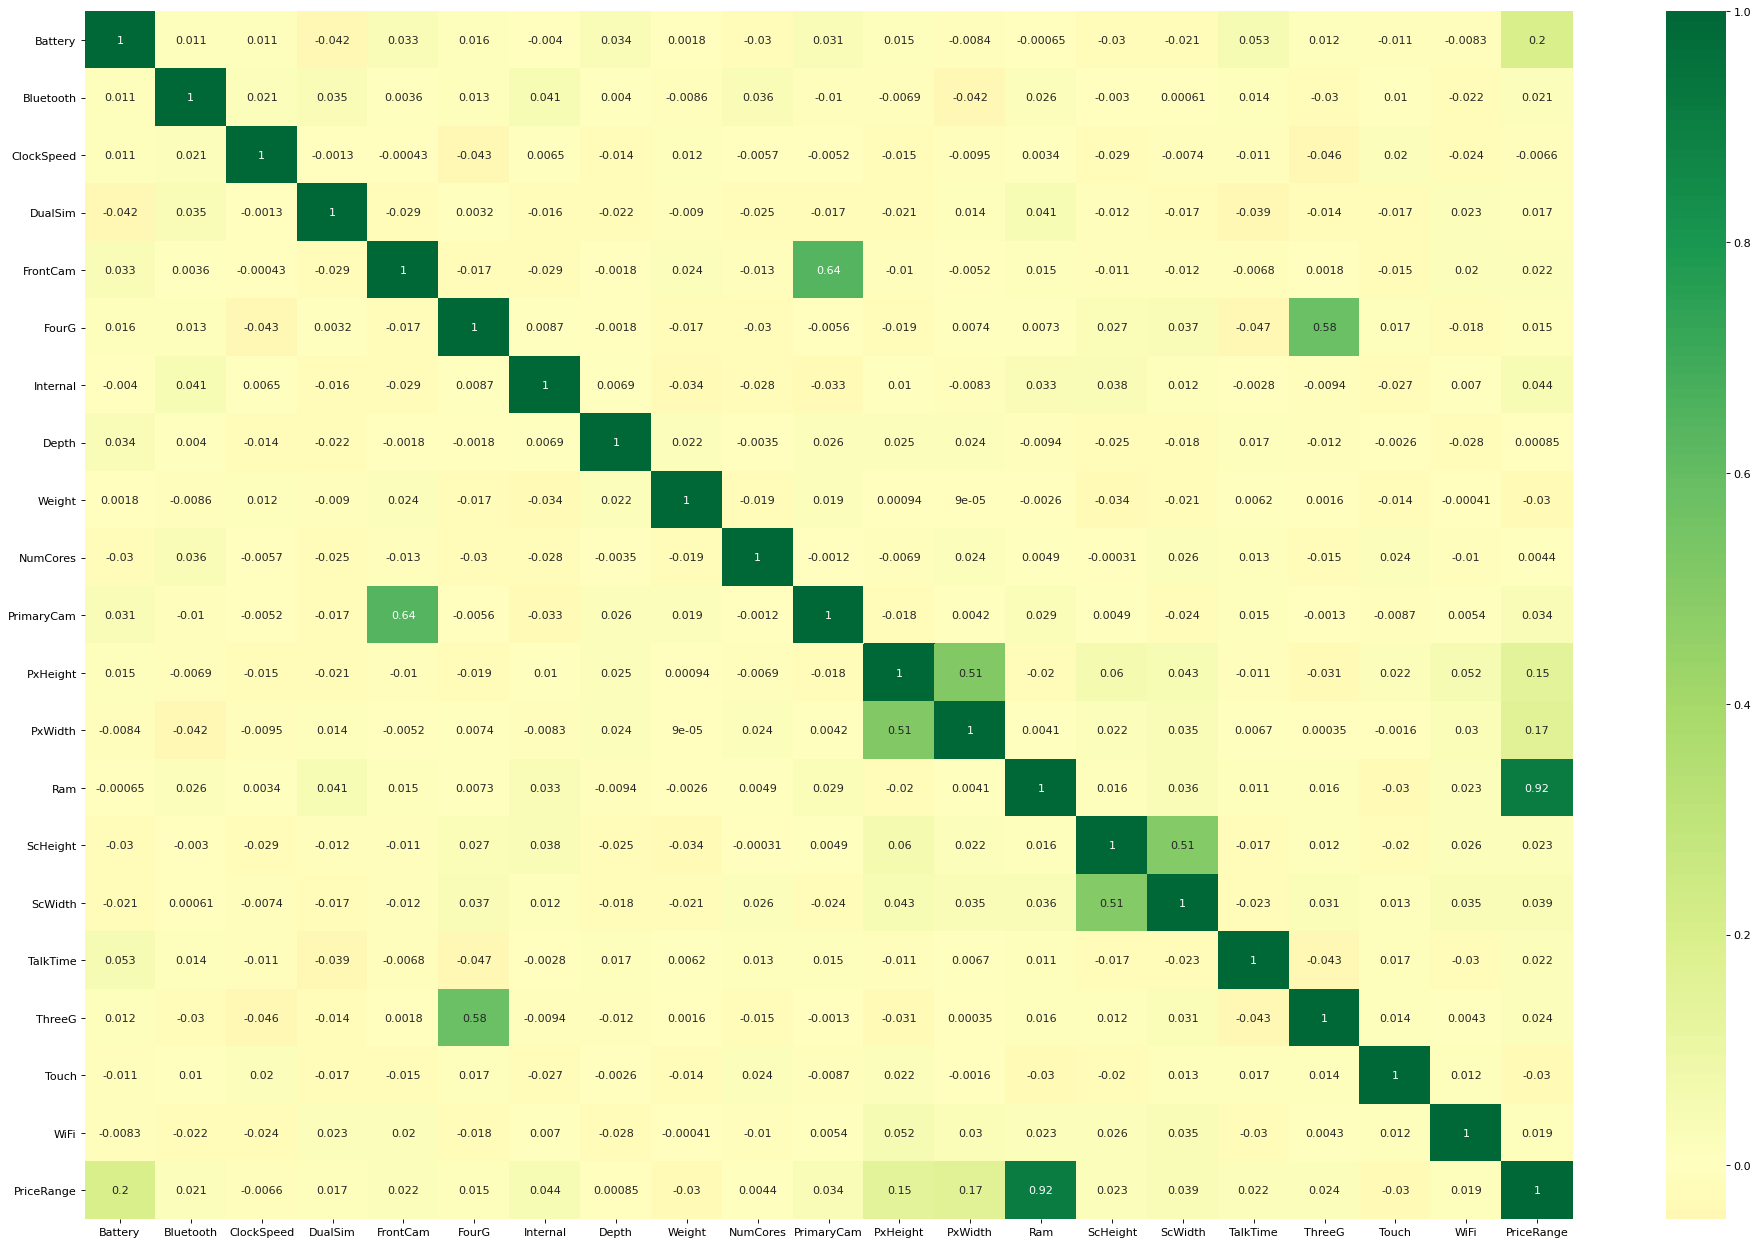

In [14]:
plt.figure(figsize = (30, 20), dpi = 80)
p = sns.heatmap(data[num_col].corr(), annot = True, center = 0, cmap = 'RdYlGn')

### ***4. Inter Class Collinearity***

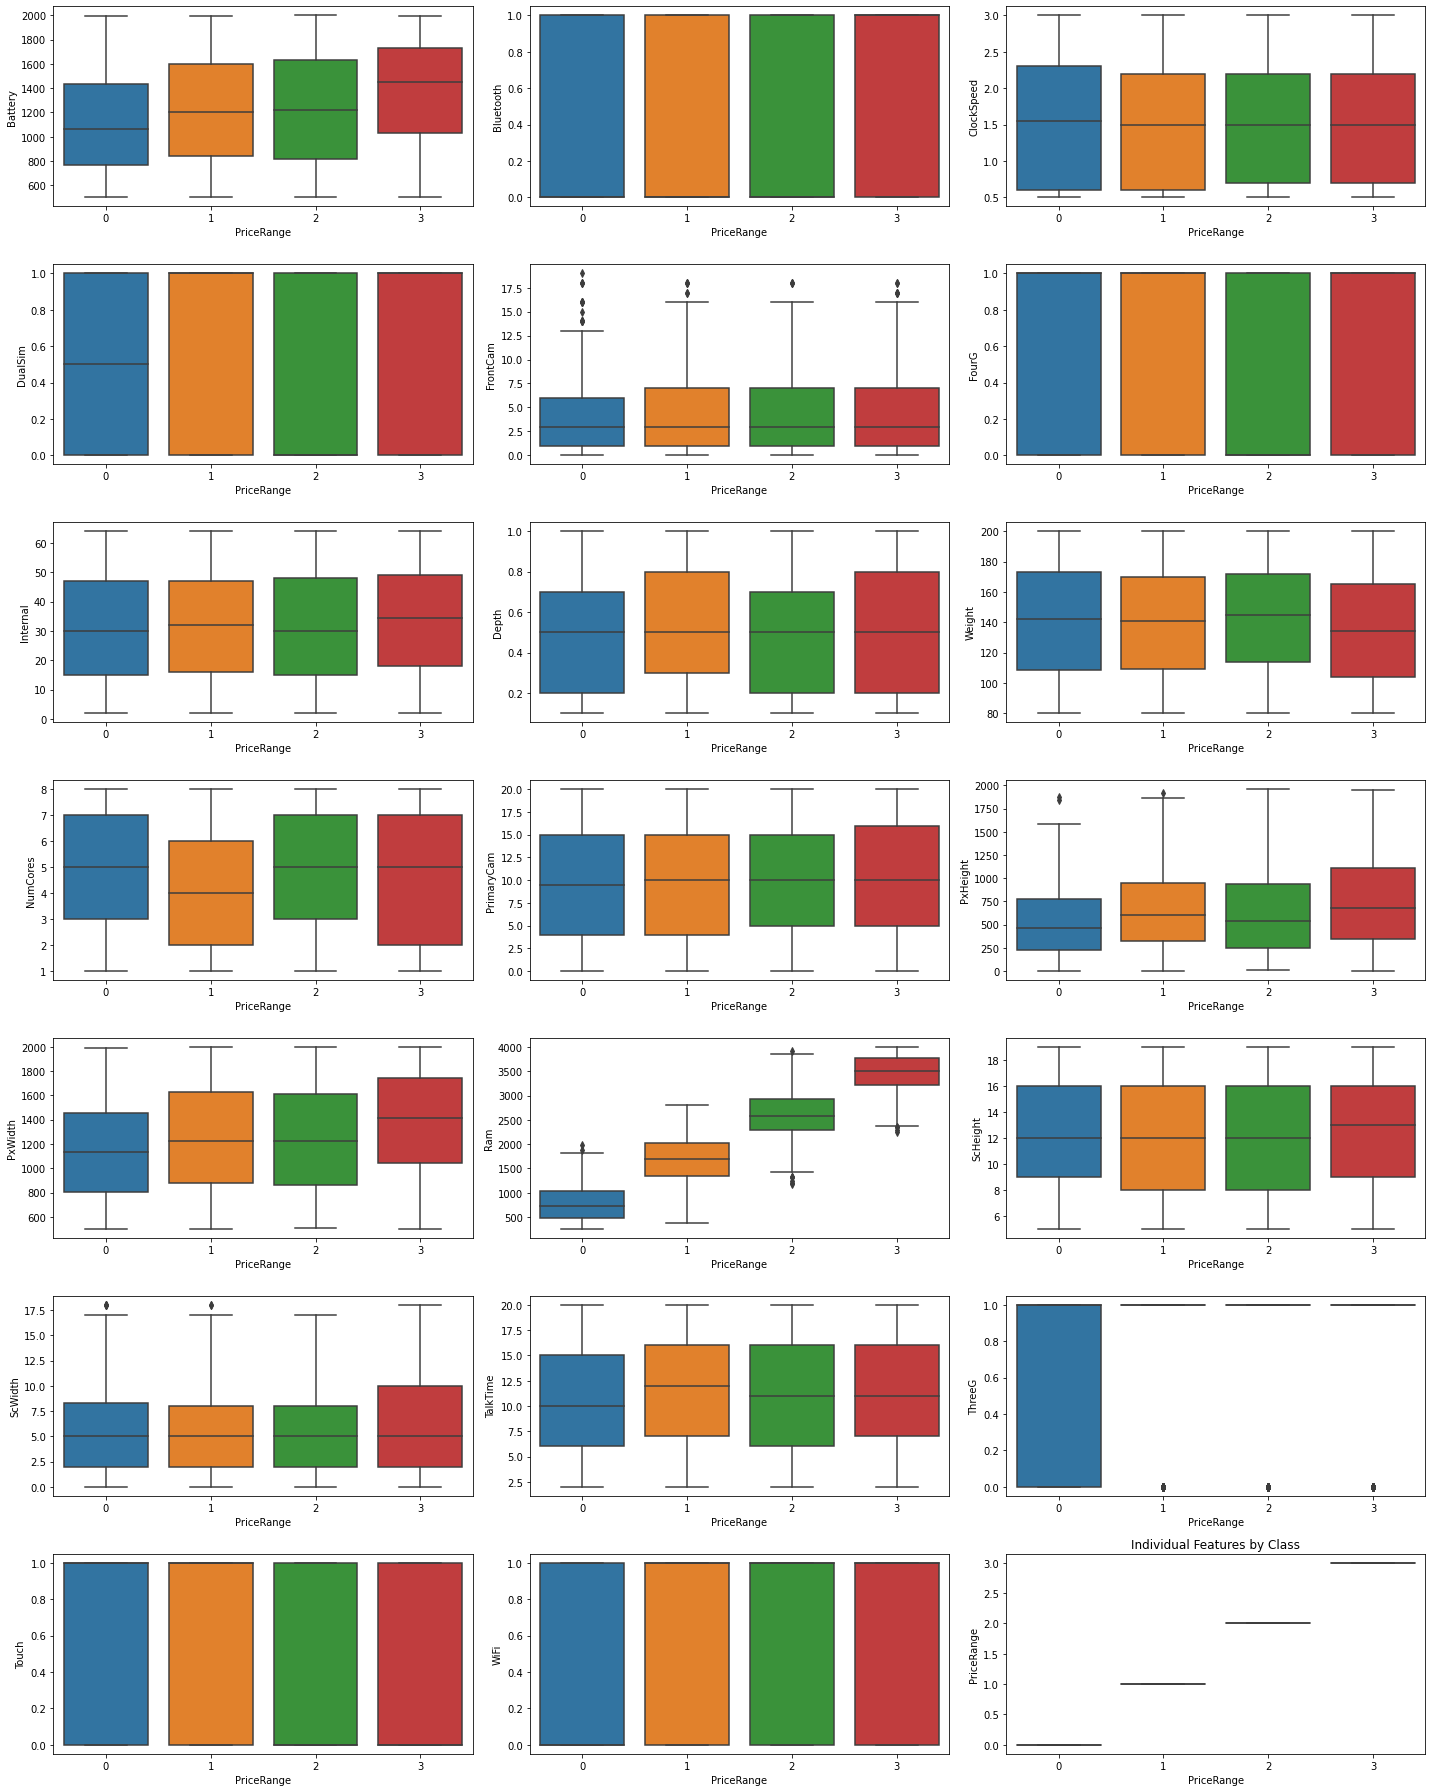

In [15]:
fig, ax = plt.subplots(nrows = 7, ncols = 3, figsize = (20,25))
plt.title('Individual Features by Class')
row = 0
col = 0
for i in range(len(data.columns)):
    if col > 2:
        row += 1
        col = 0
    axes = ax[row, col]
    sns.boxplot(x = 'PriceRange', y = data.columns[i], data = data, ax = axes)
    col += 1

plt.tight_layout()
plt.show()

In [16]:
data.head()

,Battery,Bluetooth,ClockSpeed,DualSim,FrontCam,FourG,Internal,Depth,Weight,NumCores,PrimaryCam,PxHeight,PxWidth,Ram,ScHeight,ScWidth,TalkTime,ThreeG,Touch,WiFi,PriceRange
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1


## ***Splitting Data in Train, Test and Validation***

In [17]:
X = data.drop(['PriceRange'], axis = 1)
y = data['PriceRange']

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.20, random_state = np.random)

### ***Model Evaluation and Model Metrics Functions***

In [19]:
def evaluateModel(actual, prediction):
    print('\n\n\nConfusion Matrix:\n', confusion_matrix(actual, prediction))
    print('\n\nAccuracy Score:  {:.2f}%'.format(accuracy_score(actual, prediction)*100))
    print('\n\nClassification Report:\n', classification_report(actual, prediction))

In [20]:
def mean_absolute_percentage_error(actual, prediction):
    y_true, y_pred = np.array(actual), np.array(prediction)
    return np.mean(np.abs((actual - prediction)/ actual)) * 100

In [21]:
def modelMetrics(actual, prediction):
    print('R2 Score: ',r2_score(actual, prediction))
    print('MAE Score: ', mean_absolute_error(actual, prediction))
    print('MSE Score: ', mean_squared_error(actual, prediction))
    print('MAPE Score: ', mean_absolute_percentage_error(actual, prediction))

## ***Model Building***

### ***1. Logistic Regression***

In [22]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
print('Logistic Regression Model: \n', lr)
lrpred = lr.predict(X_test)

Logistic Regression Model: 
 LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


In [23]:
modelMetrics(y_test, lrpred)

R2 Score:  0.6638809527447176
MAE Score:  0.3725
MSE Score:  0.4125
MAPE Score:  inf


In [24]:
evaluateModel(y_test, lrpred)




Confusion Matrix:
 [[77 12  1  0]
 [18 61 20  6]
 [ 0 26 46 27]
 [ 0  1 30 75]]


Accuracy Score:  64.75%


Classification Report:
               precision    recall  f1-score   support

           0       0.81      0.86      0.83        90
           1       0.61      0.58      0.60       105
           2       0.47      0.46      0.47        99
           3       0.69      0.71      0.70       106

    accuracy                           0.65       400
   macro avg       0.65      0.65      0.65       400
weighted avg       0.64      0.65      0.65       400



### ***2. Logistic Regression with Cross Validation***

In [25]:
lr2 = LogisticRegressionCV()
lr2.fit(X_train, y_train)
print('Logistic Regression Model with Cross Validation: \n', lr2)
lrcv = lr2.predict(X_test)

Logistic Regression Model with Cross Validation: 
 LogisticRegressionCV(Cs=10, class_weight=None, cv=None, dual=False,
                     fit_intercept=True, intercept_scaling=1.0, l1_ratios=None,
                     max_iter=100, multi_class='auto', n_jobs=None,
                     penalty='l2', random_state=None, refit=True, scoring=None,
                     solver='lbfgs', tol=0.0001, verbose=0)


In [26]:
modelMetrics(y_test, lrcv)

R2 Score:  0.7453643581399375
MAE Score:  0.3025
MSE Score:  0.3125
MAPE Score:  inf


In [27]:
evaluateModel(y_test, lrcv)




Confusion Matrix:
 [[77 13  0  0]
 [12 71 21  1]
 [ 0 22 55 22]
 [ 0  1 27 78]]


Accuracy Score:  70.25%


Classification Report:
               precision    recall  f1-score   support

           0       0.87      0.86      0.86        90
           1       0.66      0.68      0.67       105
           2       0.53      0.56      0.54        99
           3       0.77      0.74      0.75       106

    accuracy                           0.70       400
   macro avg       0.71      0.71      0.71       400
weighted avg       0.71      0.70      0.70       400



### ***3. Stochastic Gradient Descent Classifier***

In [28]:
sg = SGDClassifier()
sg.fit(X_train, y_train)
print('Stochastic Gradient Descent Classifier: \n', sg)
sgpred = sg.predict(X_test)

Stochastic Gradient Descent Classifier: 
 SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)


In [29]:
modelMetrics(y_test, sgpred)

R2 Score:  0.4357274176381015
MAE Score:  0.5175
MSE Score:  0.6925
MAPE Score:  inf


In [30]:
evaluateModel(y_test, sgpred)




Confusion Matrix:
 [[ 72  17   0   1]
 [ 26  52   1  26]
 [  3  26   0  70]
 [  0   3   0 103]]


Accuracy Score:  56.75%


Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.80      0.75        90
           1       0.53      0.50      0.51       105
           2       0.00      0.00      0.00        99
           3       0.52      0.97      0.67       106

    accuracy                           0.57       400
   macro avg       0.44      0.57      0.48       400
weighted avg       0.44      0.57      0.48       400



### ***4. Gaussian Naive Bayes***

In [31]:
nb = GaussianNB()
nb.fit(X_train, y_train)
print('Gaussian Naive Bayes Model: \n', nb)
nbpred = nb.predict(X_test)

Gaussian Naive Bayes Model: 
 GaussianNB(priors=None, var_smoothing=1e-09)


In [32]:
modelMetrics(y_test, nbpred)

R2 Score:  0.8431444446142016
MAE Score:  0.1925
MSE Score:  0.1925
MAPE Score:  inf


In [33]:
evaluateModel(y_test, nbpred)




Confusion Matrix:
 [[85  5  0  0]
 [12 74 19  0]
 [ 0 21 68 10]
 [ 0  0 10 96]]


Accuracy Score:  80.75%


Classification Report:
               precision    recall  f1-score   support

           0       0.88      0.94      0.91        90
           1       0.74      0.70      0.72       105
           2       0.70      0.69      0.69        99
           3       0.91      0.91      0.91       106

    accuracy                           0.81       400
   macro avg       0.81      0.81      0.81       400
weighted avg       0.80      0.81      0.81       400



### ***5. K - Nearest Neighbors Classifier***

In [34]:
kn = KNeighborsClassifier()
kn.fit(X_train, y_train)
print('K-Nearest Neighbors Classifier Model: \n', kn)
knpred = kn.predict(X_test)

K-Nearest Neighbors Classifier Model: 
 KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')


In [35]:
modelMetrics(y_test, knpred)

R2 Score:  0.9368503608187045
MAE Score:  0.0775
MSE Score:  0.0775
MAPE Score:  inf


In [36]:
evaluateModel(y_test, knpred)




Confusion Matrix:
 [[ 88   2   0   0]
 [  8  92   5   0]
 [  0   3  88   8]
 [  0   0   5 101]]


Accuracy Score:  92.25%


Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.98      0.95        90
           1       0.95      0.88      0.91       105
           2       0.90      0.89      0.89        99
           3       0.93      0.95      0.94       106

    accuracy                           0.92       400
   macro avg       0.92      0.92      0.92       400
weighted avg       0.92      0.92      0.92       400



### ***6. Random Forest Classifier***

In [37]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
print('Random Forest Classifier Model: \n', rf)
rfpred = rf.predict(X_test)

Random Forest Classifier Model: 
 RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=None, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)


In [38]:
modelMetrics(y_test, rfpred)

R2 Score:  0.9042569986606165
MAE Score:  0.1175
MSE Score:  0.1175
MAPE Score:  inf


In [39]:
evaluateModel(y_test, rfpred)




Confusion Matrix:
 [[ 88   2   0   0]
 [ 15  79  11   0]
 [  0   8  86   5]
 [  0   0   6 100]]


Accuracy Score:  88.25%


Classification Report:
               precision    recall  f1-score   support

           0       0.85      0.98      0.91        90
           1       0.89      0.75      0.81       105
           2       0.83      0.87      0.85        99
           3       0.95      0.94      0.95       106

    accuracy                           0.88       400
   macro avg       0.88      0.89      0.88       400
weighted avg       0.88      0.88      0.88       400



### ***7. Support Vector Machine Classifier***

In [40]:
sup = SVC()
sup.fit(X_train, y_train)
print('Support Vector Machine Model: \n', sup)
suppred = sup.predict(X_test)

Support Vector Machine Model: 
 SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)


In [41]:
modelMetrics(y_test, suppred)

R2 Score:  0.9694437229767925
MAE Score:  0.0375
MSE Score:  0.0375
MAPE Score:  3.494623655913978


In [42]:
evaluateModel(y_test, suppred)




Confusion Matrix:
 [[ 90   0   0   0]
 [  5  98   2   0]
 [  0   4  92   3]
 [  0   0   1 105]]


Accuracy Score:  96.25%


Classification Report:
               precision    recall  f1-score   support

           0       0.95      1.00      0.97        90
           1       0.96      0.93      0.95       105
           2       0.97      0.93      0.95        99
           3       0.97      0.99      0.98       106

    accuracy                           0.96       400
   macro avg       0.96      0.96      0.96       400
weighted avg       0.96      0.96      0.96       400



## Thought:

##### **Considering Test Size: 20%**
*Till this point, the order of model accuracy are as follows: (in Descending Order ofc)*

    1. Support Vector Machine: 96.25%
    2. K Nearest Neighbors: 92.25%
    3. Random Forest Classifier: 88.25%
    4. Gaussian Naive Bayes: 80.75%
    5. Logistic Regression with Cross Validation: 70.25%
    6. Logistic Regression: 64.75%
    7. SGD Classifier: 56.75%



#### *Before concluding on which model to choose, we will also review all confusion matrices, which will give us more insights on the model accuracy and precision.*

.

For reducing labour, I'll be choosing the top 3 models and analyse their confusion matrices.

Here we go:


## ***Visualizing Confusion Matrices***

In [97]:
#Defining Labels
k = ['Range 0', 'Range 1', 'Range 2', 'Range 3']

### **Support Vector Machine Classifier: 96.25%**

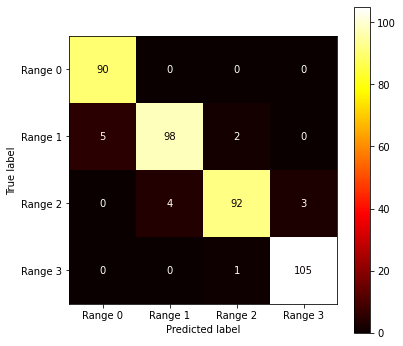

In [96]:
fig, ax = plt.subplots(figsize=(6,6))
plot_confusion_matrix(sup, X_test, y_test, cmap = 'hot', display_labels = k, values_format='.0f', ax =ax )

### **K Nearest Neighbors Classifier: 92.25%**

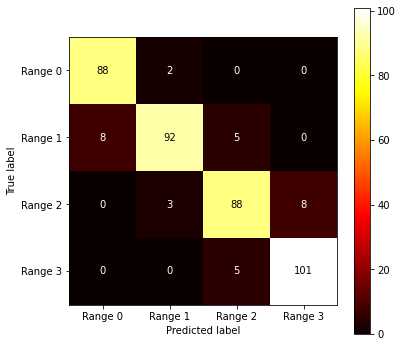

In [94]:
fig, ax = plt.subplots(figsize=(6,6))
plot_confusion_matrix(kn, X_test, y_test, cmap = 'hot', display_labels = k, values_format='.0f', ax =ax )

### **Random Forest Classifier: 88.25%**

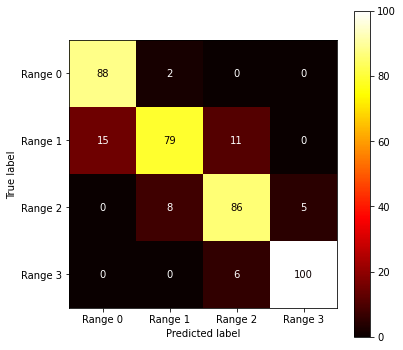

In [95]:
fig, ax = plt.subplots(figsize=(6,6))
plot_confusion_matrix(rf, X_test, y_test, cmap = 'hot', display_labels = k, values_format='.0f', ax =ax )

## **Predicting Classes for Test Data**

In [110]:
data2 = files.upload()

Saving test.csv to test.csv


In [134]:
testDf = pd.read_csv(io.BytesIO(data2['test.csv']))

In [135]:
testDf

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1,1043,1,1.8,1,14,0,5,0.1,193,3,16,226,1412,3476,12,7,2,0,1,0
1,2,841,1,0.5,1,4,1,61,0.8,191,5,12,746,857,3895,6,0,7,1,0,0
2,3,1807,1,2.8,0,1,0,27,0.9,186,3,4,1270,1366,2396,17,10,10,0,1,1
3,4,1546,0,0.5,1,18,1,25,0.5,96,8,20,295,1752,3893,10,0,7,1,1,0
4,5,1434,0,1.4,0,11,1,49,0.5,108,6,18,749,810,1773,15,8,7,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,996,1700,1,1.9,0,0,1,54,0.5,170,7,17,644,913,2121,14,8,15,1,1,0
996,997,609,0,1.8,1,0,0,13,0.9,186,4,2,1152,1632,1933,8,1,19,0,1,1
997,998,1185,0,1.4,0,1,1,8,0.5,80,1,12,477,825,1223,5,0,14,1,0,0
998,999,1533,1,0.5,1,0,0,50,0.4,171,2,12,38,832,2509,15,11,6,0,1,0


In [128]:
data.head(2)

,Battery,Bluetooth,ClockSpeed,DualSim,FrontCam,FourG,Internal,Depth,Weight,NumCores,PrimaryCam,PxHeight,PxWidth,Ram,ScHeight,ScWidth,TalkTime,ThreeG,Touch,WiFi,PriceRange
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2


In [129]:
testDf.head(2)

,id,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,1,1043,1,1.8,1,14,0,5,0.1,193,3,16,226,1412,3476,12,7,2,0,1,0
1,2,841,1,0.5,1,4,1,61,0.8,191,5,12,746,857,3895,6,0,7,1,0,0


In [136]:
print('Shape of Original Data: ',data.shape)
print('Shape of Test Data: ',testDf.shape)

Shape of Original Data:  (2000, 21)
Shape of Test Data:  (1000, 21)


In [137]:
testDf.drop('id', inplace = True, axis = 1)

In [140]:
testDf.columns = names[:-1]

In [142]:
predictions = sup.predict(testDf)

In [143]:
testDf['PriceRange'] = predictions
testDf

,Battery,Bluetooth,ClockSpeed,DualSim,FrontCam,FourG,Internal,Depth,Weight,NumCores,PrimaryCam,PxHeight,PxWidth,Ram,ScHeight,ScWidth,TalkTime,ThreeG,Touch,WiFi,PriceRange
0,1043,1,1.8,1,14,0,5,0.1,193,3,16,226,1412,3476,12,7,2,0,1,0,3
1,841,1,0.5,1,4,1,61,0.8,191,5,12,746,857,3895,6,0,7,1,0,0,3
2,1807,1,2.8,0,1,0,27,0.9,186,3,4,1270,1366,2396,17,10,10,0,1,1,2
3,1546,0,0.5,1,18,1,25,0.5,96,8,20,295,1752,3893,10,0,7,1,1,0,3
4,1434,0,1.4,0,11,1,49,0.5,108,6,18,749,810,1773,15,8,7,1,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,1700,1,1.9,0,0,1,54,0.5,170,7,17,644,913,2121,14,8,15,1,1,0,2
996,609,0,1.8,1,0,0,13,0.9,186,4,2,1152,1632,1933,8,1,19,0,1,1,1
997,1185,0,1.4,0,1,1,8,0.5,80,1,12,477,825,1223,5,0,14,1,0,0,0
998,1533,1,0.5,1,0,0,50,0.4,171,2,12,38,832,2509,15,11,6,0,1,0,2


In [144]:
testDf.to_csv('Test_Data_Predicted.csv')

## ***Export Model***

In [145]:
joblib.dump(sup,'SVM_Model.pkl')
print('Model Generated')

Model Generated
